              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3053
           2       0.76      0.81      0.79        16
           3       0.56      0.42      0.48        12

    accuracy                           0.99      3081
   macro avg       0.77      0.74      0.75      3081
weighted avg       0.99      0.99      0.99      3081



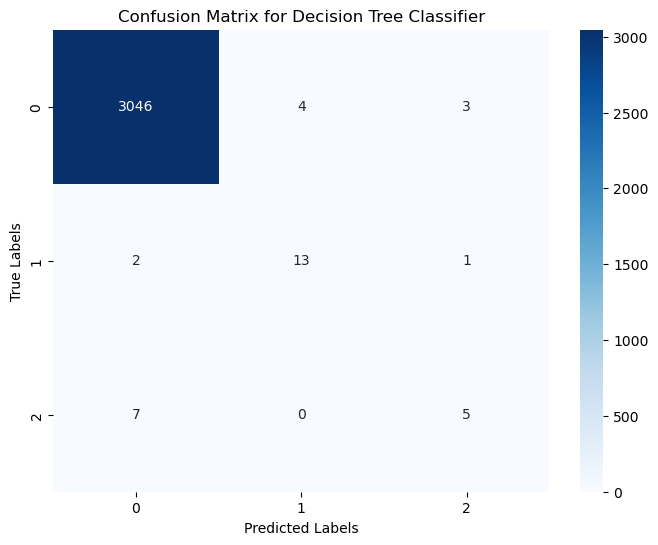

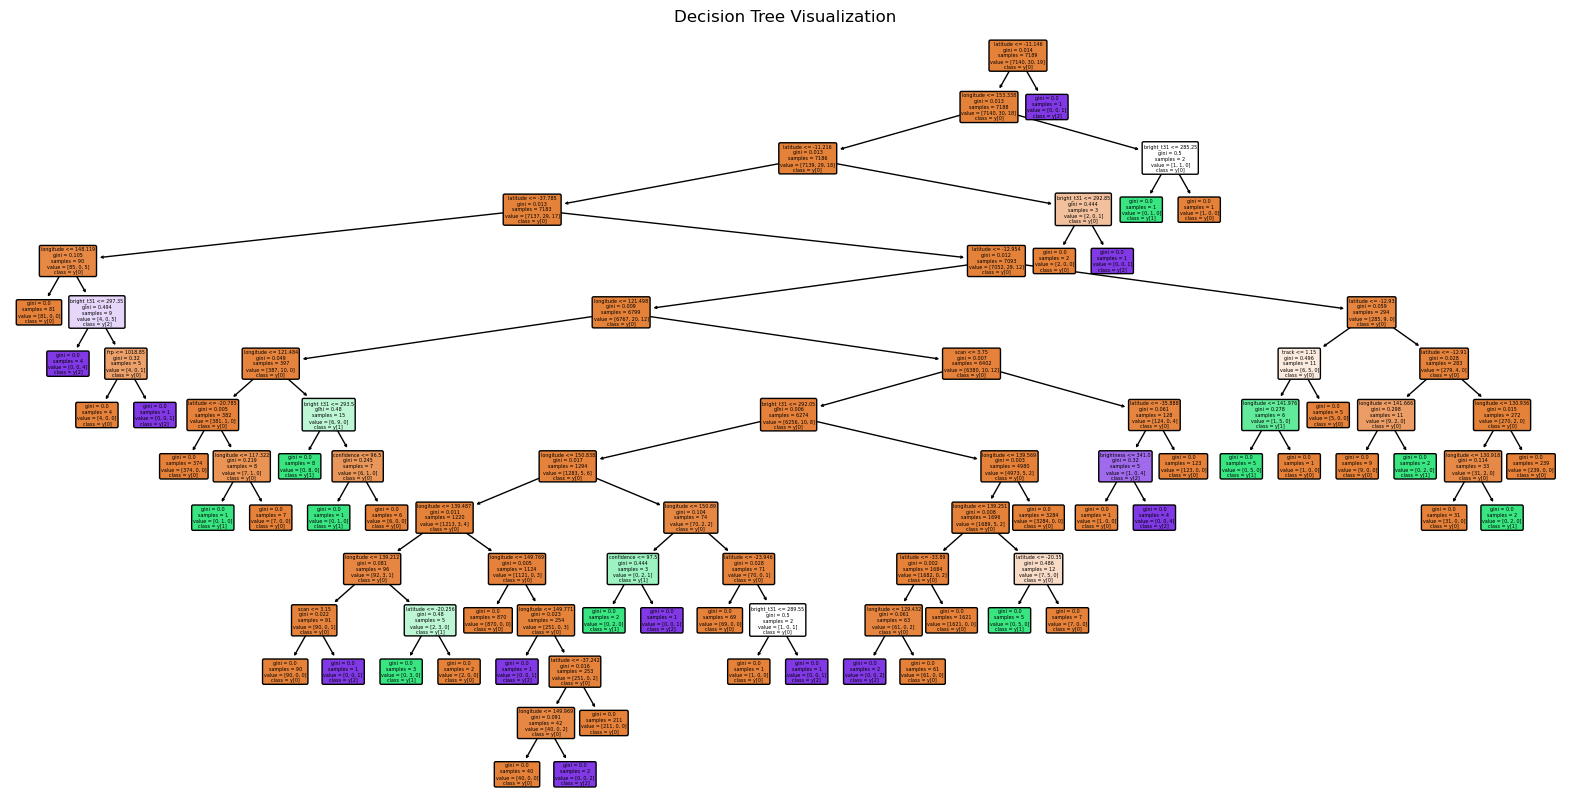

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/prathameshmandhare/Downloads/wildfire.csv')

# Feature selection
feature_columns = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
X = data[feature_columns]
y = data['type']  # Assuming 'type' is the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=feature_columns, class_names=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


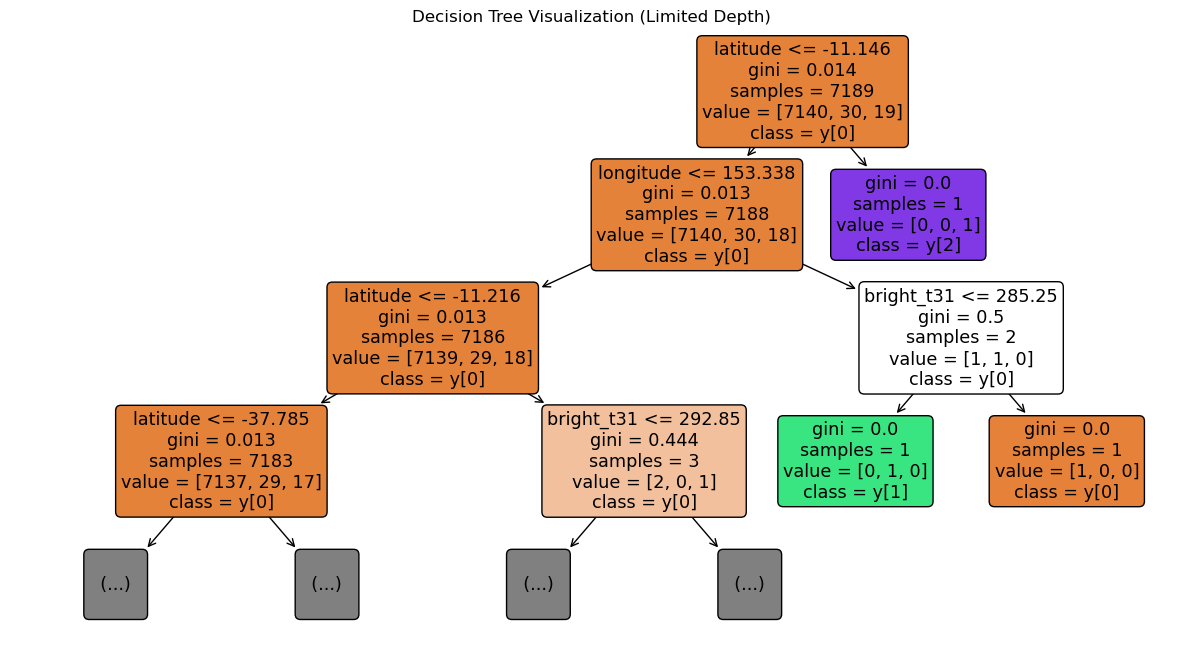

In [3]:
# Decision Tree Visualization with Limited Depth
plt.figure(figsize=(15, 8))
plot_tree(dt_classifier, filled=True, feature_names=feature_columns, class_names=True, rounded=True, max_depth=3)
plt.title('Decision Tree Visualization (Limited Depth)')
plt.show()
